In [1]:
#Normalise a Distribution Using Log, Sqrt, MinMax, and Quantile Transformer


In [1]:
# Import required modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

%matplotlib inline
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("C:/Users/Travel Your Style/Documents/IOD Course 22 June 20/DATA/titanic_train.csv")

In [3]:
df.select_dtypes("number")

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
#Fares is numerical and has no null values - will be target for normalisation

In [3]:
fare= df["Fare"]

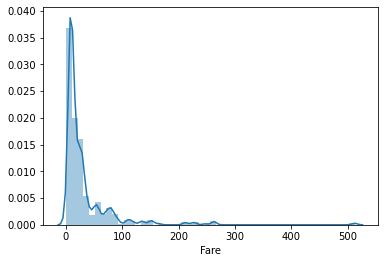

In [4]:
sns.distplot(fare)

In [5]:
from scipy.stats import skew

In [6]:
skew(fare)

4.7792532923723545

In [7]:
#look at log transfomation
log_fare=np.log(fare + 0.01)

In [11]:
skew_log=skew(log_fare)

In [8]:
#look Square root Transformation
sqrt_fare=np.sqrt(fare)
skew_sqrt=skew(sqrt_fare)

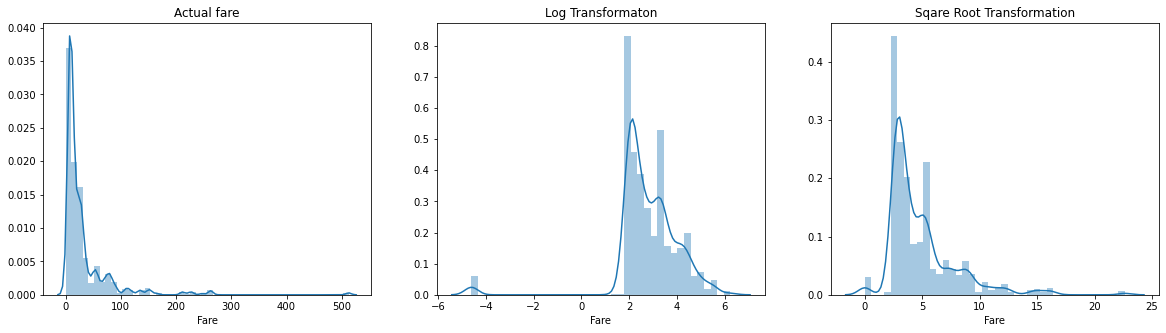

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))

sns.distplot(fare, ax=ax[0])
ax[0].set_title("Actual fare")

sns.distplot(log_fare, ax=ax[1])
ax[1].set_title("Log Transformaton")

sns.distplot(sqrt_fare, ax=ax[2])
ax[2].set_title("Sqare Root Transformation")

plt.show()

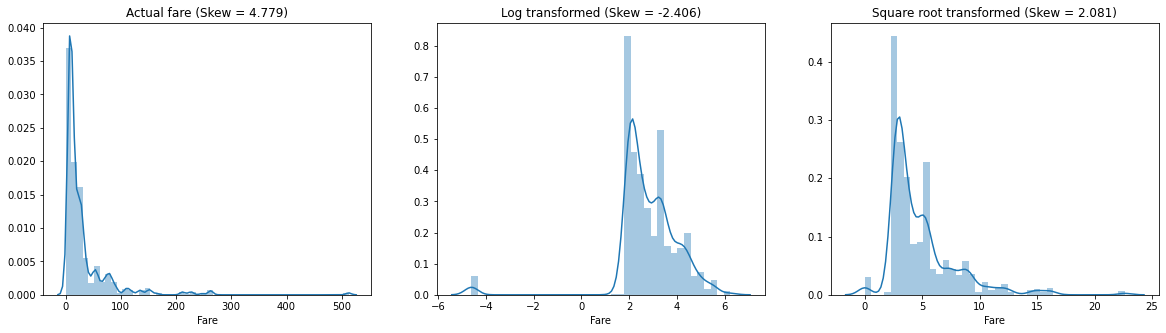

In [10]:
from scipy.stats import skew

# Skew actual fare
skew_fare = skew(fare)

# Log transform fare
log_fare = np.log(fare + 0.01)
skew_log = skew(log_fare)

# Square root transform fare
sqrt_fare = np.sqrt(fare)
skew_sqrt = skew(sqrt_fare)

fig, ax = plt.subplots(1, 3, figsize=(20,5))

sns.distplot(fare, ax=ax[0])
ax[0].set_title("Actual fare (Skew = %.3f)"%skew_fare)

sns.distplot(log_fare, ax=ax[1])
ax[1].set_title("Log transformed (Skew = %.3f)"%skew_log)

sns.distplot(sqrt_fare, ax=ax[2])
ax[2].set_title("Square root transformed (Skew = %.3f)"%skew_sqrt)
plt.show()


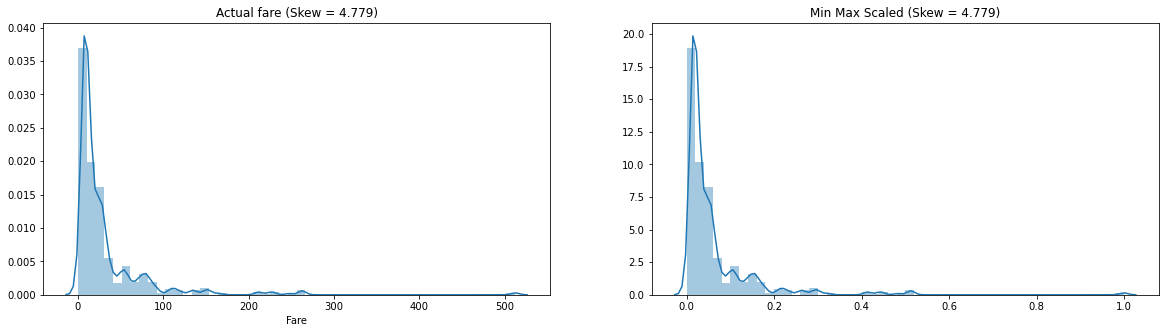

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_fare = scaler.fit_transform(df[['Fare']])
skew_scaled = skew(scaled_fare)

fig, ax = plt.subplots(1, 2, figsize=(20,5))

sns.distplot(fare, ax=ax[0])
ax[0].set_title("Actual fare (Skew = %.3f)"%skew_fare)

sns.distplot(scaled_fare, ax=ax[1])
ax[1].set_title("Min Max Scaled (Skew = %.3f)"%skew_scaled)

plt.show()

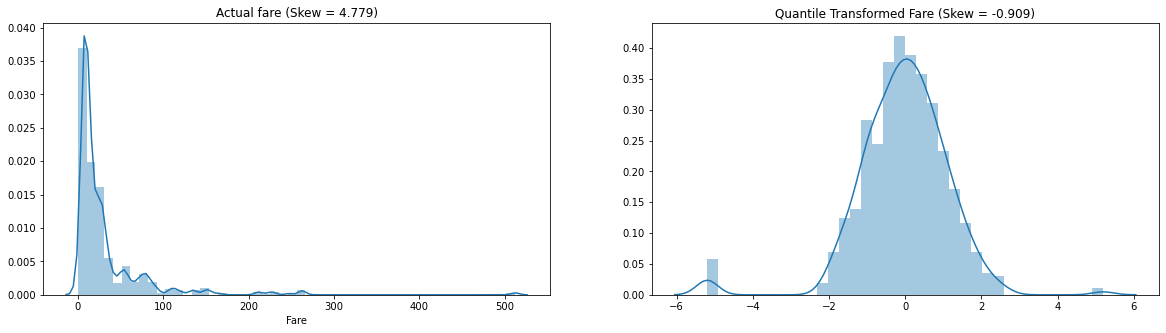

In [12]:
from sklearn.preprocessing import QuantileTransformer

rng = np.random.RandomState(115)

qt = QuantileTransformer(n_quantiles = 500, output_distribution = 'normal', random_state = rng)

qt_fare = qt.fit_transform(df[['Fare']])
skew_qt = skew(qt_fare)

fig, ax = plt.subplots(1, 2, figsize=(20,5))

sns.distplot(fare, ax=ax[0])
ax[0].set_title("Actual fare (Skew = %.3f)"%skew_fare)

sns.distplot(qt_fare, ax=ax[1])
ax[1].set_title("Quantile Transformed Fare (Skew = %.3f)"%skew_qt)

plt.show()